In [1]:
import pandas as pd

In [2]:
#create dico
data={
    'apple':[2,3,4,5,6],
     'oranges':[0,4,7,5,4],
      'banana':[3,1,5,1,2]

}

In [3]:
data

{'apple': [2, 3, 4, 5, 6],
 'oranges': [0, 4, 7, 5, 4],
 'banana': [3, 1, 5, 1, 2]}

In [4]:
fruits=pd.DataFrame(data)

In [5]:
fruits

,apple,oranges,banana
0,2,0,3
1,3,4,1
2,4,7,5
3,5,5,1
4,6,4,2


In [6]:
purchases=pd.DataFrame((data),index=['A','B','C','D','E'])

In [7]:
purchases

,apple,oranges,banana
A,2,0,3
B,3,4,1
C,4,7,5
D,5,5,1
E,6,4,2


In [8]:
purchases.loc['B']

apple      3
oranges    4
banana     1
Name: B, dtype: int64

In [9]:
import os


In [10]:
pwd


'C:\\Users\\Administrateur'

In [11]:
os.getcwd()

'C:\\Users\\Administrateur'

In [13]:
test = df[['Value Date', 'CV USD']]
test.head()

NameError: name 'df' is not defined

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
df.isnull().head(5)

In [ ]:
df.dropna()

In [ ]:
df.describe()

In [ ]:
df.corr()

In [ ]:
test = df[['Value Date', 'CV USD']]
test.head()
#test=df.groupby('year').sum()

Pandas GroupBy

In [14]:
import pandas as pd
import numpy as np
df = pd.read_csv(r'C:\Users\Administrateur\Downloads\StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


How Groupby Works?
Groupby function splits the dataset based on criteria that you define. Here I am showing the process behind the groupby function. It will give you an idea, how much work we may have to do if we would not have groupby function. I will make a new smaller dataset of two columns only to demonstrate in this section. The columns are ‘gender’ and ‘reading score’.

In [15]:
test = df[['gender', 'reading score']]
test.head()

,gender,reading score
0,female,72
1,female,90
2,female,95
3,male,57
4,male,78


Let’s find out the average reading score gender-wise
First, we need to split the dataset based on gender. Generate the data for females only.

In [16]:
female = test['gender'] == 'female'
test[female].head()

,gender,reading score
0,female,72
1,female,90
2,female,95
5,female,83
6,female,95


In the same way, generate the data for the males,

In [17]:
male = test['gender'] == 'male'
test[male].head()

,gender,reading score
3,male,57
4,male,78
7,male,43
8,male,64
10,male,54


Using females and males dataset above to calculate the mean reading score for females and males respectively.

In [18]:
fe_avg = test[female]['reading score'].mean()
male_avg = test[male]['reading score'].mean()
print(fe_avg, male_avg)

72.60810810810811 65.47302904564316


The mean reading score of females is 72.608 and the mean reading score for males is 65.473. Now, make a DataFrame for the mean reading score of females and males.

In [19]:
df_reading = pd.DataFrame({'Gender': ['female', 'male'], 'reading score': [fe_avg, male_avg]})
df_reading

,Gender,reading score
0,female,72.608108
1,male,65.473029


Now, let’s solve the same problem with the groupby function. Splitting the data based on gender and applying the ‘mean’ on it with just one simple line of code:

In [20]:
test.groupby('gender').mean()

,reading score
gender,
female,72.608108
male,65.473029


This small piece of code gives the same result.
Groups in Groupby
I will use the original dataset ‘df’ now. Make groups of ‘race/ethnicity’.

In [21]:
race = df.groupby('race/ethnicity')
print(race)

It returns an object. Now check the datatype of ‘race’.


In [22]:
type(race)

pandas.core.groupby.generic.DataFrameGroupBy

So, we generated a DataFrameGroupBy object. Calling groups on this DataFrameGroupBy object will return the indices of each group.

In [23]:
race.groups

{'group A': [3, 13, 14, 25, 46, 61, 62, 72, 77, 82, 88, 112, 129, 143, 150, 151, 170, 228, 250, 296, 300, 305, 327, 356, 365, 368, 378, 379, 384, 395, 401, 402, 423, 428, 433, 442, 444, 464, 467, 468, 483, 489, 490, 506, 511, 539, 546, 571, 575, 576, 586, 589, 591, 597, 614, 623, 635, 651, 653, 688, 697, 702, 705, 731, 741, 769, 778, 805, 810, 811, 816, 820, 830, 832, 837, 851, 892, 902, 911, 936, 943, 960, 966, 972, 974, 983, 985, 988, 994], 'group B': [0, 2, 5, 6, 7, 9, 12, 17, 21, 26, 31, 39, 42, 43, 45, 65, 68, 75, 80, 81, 94, 96, 100, 103, 108, 109, 116, 121, 125, 126, 136, 146, 152, 157, 158, 160, 162, 167, 168, 176, 178, 188, 192, 198, 199, 203, 208, 209, 215, 218, 219, 221, 224, 232, 238, 247, 248, 252, 258, 274, 279, 284, 285, 287, 288, 295, 303, 308, 310, 311, 318, 329, 333, 335, 338, 342, 346, 350, 355, 360, 361, 380, 396, 398, 406, 407, 413, 424, 443, 448, 449, 459, 461, 474, 480, 484, 488, 494, 498, 501, ...], 'group C': [1, 4, 10, 15, 16, 18, 19, 23, 27, 28, 40, 41, 47, 4

Have a look at the output above. Groupby function splits the data into subgroups and you can now see the indices of each subgroup. That’s great! But only the indices are not enough. We need to see the real data of each group. The function ‘get_group’ helps with that.



In [24]:
race.get_group('group B')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
...,...,...,...,...,...,...,...,...
969,female,group B,bachelor's degree,standard,none,75,84,80
976,male,group B,some college,free/reduced,completed,60,62,60
980,female,group B,high school,free/reduced,none,8,24,23
982,male,group B,some high school,standard,completed,79,85,86


Find the size of each group
Calling size on the ‘race’ object will give the size of each group


In [25]:
race.size()

race/ethnicity
group A     89
group B    190
group C    319
group D    262
group E    140
dtype: int64

You can loop over the groups. Here is an example:


In [26]:
for name, group in race:
    print(name, 'has', group.shape[0], 'data')

group A has 89 data
group B has 190 data
group C has 319 data
group D has 262 data
group E has 140 data


Grouping by multiple variables
In all the examples above, we only grouped by one variable. But grouping by multiple variables is also possible. Here I am grouping by ‘race/ethnicity’ and ‘gender’. This should return the number of data of each race segregated by gender.


In [27]:
df.groupby(['gender', 'race/ethnicity']).size()

gender  race/ethnicity
female  group A            36
        group B           104
        group C           180
        group D           129
        group E            69
male    group A            53
        group B            86
        group C           139
        group D           133
        group E            71
dtype: int64

This example aggregates the data using ‘size’. There are other aggregate functions as well. Here is the list of all the aggregate functions:
sum() mean()     size()     count() std() var() sem() min() median() Please try them out. Just replace any of these aggregate functions instead of the ‘size’ in the above example.
Using multiple aggregate functions
The way we can use groupby on multiple variables, using multiple aggregate functions is also possible. This next example will group by ‘race/ethnicity and will aggregate using ‘max’ and ‘min’ functions.


In [28]:
df.groupby('race/ethnicity').agg([np.max, np.min])

gender         parental level of education                      \
                 amax    amin                        amax                amin   
race/ethnicity                                                                  
group A          male  female            some high school  associate's degree   
group B          male  female            some high school  associate's degree   
group C          male  female            some high school  associate's degree   
group D          male  female            some high school  associate's degree   
group E          male  female            some high school  associate's degree   

                   lunch               test preparation course             \
                    amax          amin                    amax       amin   
race/ethnicity                                                              
group A         standard  free/reduced                    none  completed   
group B         standard  free/reduced                    none  completed   
group C         standard  free/reduced                    none  completed   
group D         standard  free/reduced                    none  completed   
group E         standard  free/reduced                    none  completed   

               math score      reading score      writing score       
                     amax amin          amax amin          amax amin  
race/ethnicity                                                        
group A               100   28           100   23            97   19  
group B                97    8            97   24            96   15  
group C                98    0           100   17           100   10  
group D               100   26           100   31           100   32  
group E               100   30           100   26           100   22

The aggregate function worked on each column here. Because we did not specify any column.
Make a DataFrame of minimum and the maximum score of the math, reading, and writing for each race.
To do that, use the previous code and just add the scores like this:


In [29]:
df.groupby('race/ethnicity')['math score', 'reading score', 'writing score'].agg([np.max, np.min])

<ipython-input-29-5d4372ca06b7>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('race/ethnicity')['math score', 'reading score', 'writing score'].agg([np.max, np.min])


math score      reading score      writing score     
                     amax amin          amax amin          amax amin
race/ethnicity                                                      
group A               100   28           100   23            97   19
group B                97    8            97   24            96   15
group C                98    0           100   17           100   10
group D               100   26           100   31           100   32
group E               100   30           100   26           100   22

Groupby on multiple variables and use multiple aggregate functions
To demonstrate this, we will groupby on ‘race/ethnicity’ and ‘gender’. Also, use two aggregate functions ‘min’ and ‘max’. Let’s make a DataFrame that contains the maximum and minimum score in math, reading, and writing for each group segregated by gender.


In [30]:
df.groupby(['race/ethnicity', 'gender'])['math score', 'reading score', 'writing score'].agg([np.max, np.min])

<ipython-input-30-cf87f8f08501>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['race/ethnicity', 'gender'])['math score', 'reading score', 'writing score'].agg([np.max, np.min])


math score      reading score      writing score     
                            amax amin          amax amin          amax amin
race/ethnicity gender                                                      
group A        female         92   34           100   43            97   41
               male          100   28            96   23            92   19
group B        female         97    8            97   24            96   23
               male           94   30            96   24            92   15
group C        female         96    0           100   17           100   10
               male           98   27           100   28            95   27
group D        female         98   26           100   31           100   32
               male          100   39            97   34            99   34
group E        female        100   32           100   34           100   38
               male          100   30           100   26           100   22

Different aggregate functions on different columns
Group by ‘race/ethnicity’ and use max and mean on math score and median and min on reading score.


In [31]:
df.groupby('race/ethnicity').agg({'math score': ['max', 'mean'], 
                                 'reading score': ['median','min']})

math score            reading score    
                      max       mean        median min
race/ethnicity                                        
group A               100  61.629213            64  23
group B                97  63.452632            67  24
group C                98  64.463950            71  17
group D               100  67.362595            71  31
group E               100  73.821429            74  26

Cool, right? But the column names are not that nice and clear. They should be clearer and nicer. We can change the column names like this:


In [32]:
math_read = df.groupby('race/ethnicity').agg({'math score': ['max', 'mean'], 'reading score': ['max', 'mean']})
math_read.columns=['Max Math Score', 'Average Math Score', 'Max Reading Score', 'Average Reading Score' ]
math_read

,Max Math Score,Average Math Score,Max Reading Score,Average Reading Score
race/ethnicity,,,,
group A,100,61.629213,100,64.674157
group B,97,63.452632,97,67.352632
group C,98,64.463950,100,69.103448
group D,100,67.362595,100,70.030534
group E,100,73.821429,100,73.028571


Use the aggregate function on nominal columns
In all the examples above, we used aggregate functions on numeric columns. Apply aggregate functions on some nominal columns such as ‘lunch’ and ‘parental level of education’.


In [33]:
df.groupby(['race/ethnicity', 'gender']).agg({'lunch': pd.Series.mode, 'parental level of education': pd.Series.mode, 'math score':np.mean})

lunch parental level of education  math score
race/ethnicity gender                                                  
group A        female  standard            some high school   58.527778
               male    standard            some high school   63.735849
group B        female  standard                 high school   61.403846
               male    standard                some college   65.930233
group C        female  standard          associate's degree   62.033333
               male    standard                 high school   67.611511
group D        female  standard                some college   65.248062
               male    standard                some college   69.413534
group E        female  standard          associate's degree   70.811594
               male    standard          associate's degree   76.746479

As you can see in the code above, the syntax was different for nominal data. Just as reminder mode is the data that appears the most.
Apply a function in Groupby
Calculate how many kids ‘parental levels of education’ is the high school level.


In [34]:
df.groupby(df['parental level of education'].apply(lambda x: 'high' in x)).size()

parental level of education
False    625
True     375
dtype: int64

Cut the ‘math score’ column in three even buckets and define them as low, average and high scores


In [35]:
df.groupby(pd.qcut(x=df['math score'], q=3, labels=['low', 'average', 'high'])).size()

math score
low        339
average    341
high       320
dtype: int64

If you want to set the cut point and define your low, average, and high, that is also a simple method.


In [36]:
df.groupby(pd.cut(df['math score'], [0, 40, 70, 100])).size()

math score
(0, 40]       49
(40, 70]     559
(70, 100]    391
dtype: int64

Transform with Groupby
Generate a new column in the DataFrame ‘df’ and add a column that contains the difference of each math score from the mean math score.


In [37]:
df['Distance From the Mean'] = df.groupby(['race/ethnicity', 'gender'])['math score'].transform(lambda x: x - x.mean())
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Distance From the Mean
0,female,group B,bachelor's degree,standard,none,72,72,74,10.596154
1,female,group C,some college,standard,completed,69,90,88,6.966667
2,female,group B,master's degree,standard,none,90,95,93,28.596154
3,male,group A,associate's degree,free/reduced,none,47,57,44,-16.735849
4,male,group C,some college,standard,none,76,78,75,8.388489
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,17.188406
996,male,group C,high school,free/reduced,none,62,55,55,-5.611511
997,female,group C,high school,free/reduced,completed,59,71,65,-3.033333
998,female,group D,some college,standard,completed,68,78,77,2.751938


Look at the DataFrame above. There is a new column at the end named ‘Distance From the Mean’.
Filter Using Groupby
You can filter out the data based on certain conditions to make the data more meaningful. Filter the group or race that has less than 100 rows of data.


In [38]:
df_n = df.groupby('race/ethnicity').filter(lambda x: len(x) > 100)


The code above says that keep the groups that have a length of more than 100. Check the length of the original DataFrame ‘df’ and the filtered DataFrame ‘df_n’.


In [39]:
print(len(df))
print(len(df_n))

1000
911


Map the mean reading score of each group and generate a new column.


In [40]:
df['New'] = df['race/ethnicity'].map(df.groupby(['race/ethnicity'])['reading score'].mean())
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Distance From the Mean,New
0,female,group B,bachelor's degree,standard,none,72,72,74,10.596154,67.352632
1,female,group C,some college,standard,completed,69,90,88,6.966667,69.103448
2,female,group B,master's degree,standard,none,90,95,93,28.596154,67.352632
3,male,group A,associate's degree,free/reduced,none,47,57,44,-16.735849,64.674157
4,male,group C,some college,standard,none,76,78,75,8.388489,69.103448
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,17.188406,73.028571
996,male,group C,high school,free/reduced,none,62,55,55,-5.611511,69.103448
997,female,group C,high school,free/reduced,completed,59,71,65,-3.033333,69.103448
998,female,group D,some college,standard,completed,68,78,77,2.751938,70.030534


Look at this DataFrame. There is a new column named ‘New’ at the end, that is containing the mean reading score of the corresponding group.
Visualization Using Groupby
As we all know, a picture says a thousand words. Here is some demonstration of visualization techniques in groupby. Make a bar plot of the parental level of education.


<AxesSubplot:xlabel='parental level of education'>

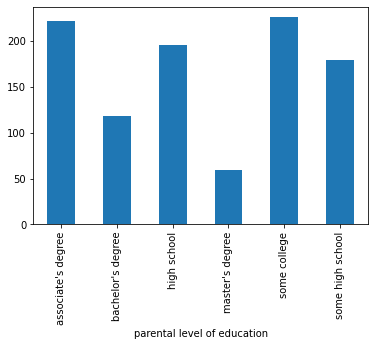

In [41]:
import matplotlib.pyplot as plt
plt.clf()
df.groupby('parental level of education').size().plot(kind='bar')


Please try making a pie plot. You just need to use ‘pie’ instead of ‘bar’ in the code above. If you do not pass any ‘kind’, the plot will be a simple line plot.

<AxesSubplot:ylabel='None'>

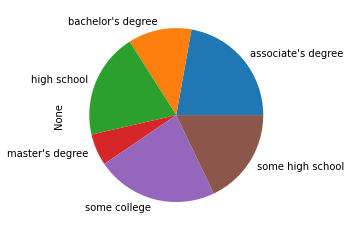

In [42]:
df.groupby('parental level of education').size().plot(kind='pie')

Let’s plot the mean math score of each group.


<AxesSubplot:xlabel='race/ethnicity'>

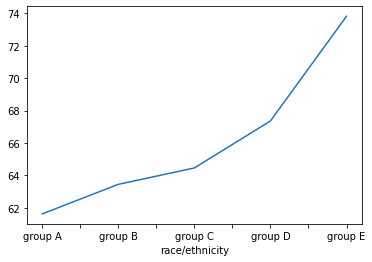

In [43]:
df.groupby('race/ethnicity')['math score'].mean().plot()

Conclusion
In this article, you learned to group and summarize the data in many different ways. You learned to use aggregate functions, data transformation, filter, map, and visualization using groupby.

Gain an introduction to the DataFrame and Series data structures of the pandas library
Access and manipulate data within a DataFrame and Series
Import CSV data into a pandas DataFrame
Reindex a DataFrame to shuffle data

In [1]:
from __future__ import print_function

import pandas as pd
pd.__version__

'1.1.2'

One way to create a Series is to construct a Series object. For example:

In [3]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'housing_median_age'}>]],
      dtype=object)

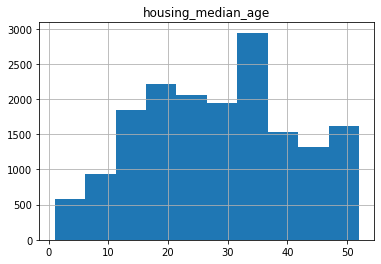

In [4]:
california_housing_dataframe.hist('housing_median_age')

In [6]:
city_names = pd.Series(['California', 'Chicago'])
population = [1200000, 2300000]
cities = pd.DataFrame({ 'City name': city_names, 'Population': population })
print(type(cities['City name']))
cities['City name']

<class 'pandas.core.series.Series'>


0    California
1       Chicago
Name: City name, dtype: object

In [7]:
print(type(cities['City name'][1]))
cities['City name'][1]

<class 'str'>


'Chicago'

In [8]:
print(type(cities[0:2]))
cities[0:2]

<class 'pandas.core.frame.DataFrame'>


,City name,Population
0,California,1200000
1,Chicago,2300000


In [10]:
import numpy as np

p = np.log(population)
p

array([13.99783211, 14.64841968])

In [11]:
cities['Area square miles'] = pd.Series([46.87, 176.53])
cities['Population density'] = cities['Population'] / cities['Area square miles']
cities

,City name,Population,Area square miles,Population density
0,California,1200000,46.87,25602.730958
1,Chicago,2300000,176.53,13028.946921


In [12]:
c1 = cities['Area square miles'] > 50
c1

0    False
1     True
Name: Area square miles, dtype: bool

In [13]:
city_names.index

RangeIndex(start=0, stop=2, step=1)

In [14]:
cities.index

RangeIndex(start=0, stop=2, step=1)

In [15]:
cities.reindex([1, 0])

,City name,Population,Area square miles,Population density
1,Chicago,2300000,176.53,13028.946921
0,California,1200000,46.87,25602.730958


Reindexing is a great way to shuffle (randomize) a DataFrame. In the example below, we take the index, which is array-like, and pass it to NumPy's random.permutation function, which shuffles its values in place. Calling reindex with this shuffled array causes the DataFrame rows to be shuffled in the same way. Try running the following cell multiple times!

In [23]:
cities.reindex(np.random.permutation(cities.index))

,City name,Population,Area square miles,Population density
1,Chicago,2300000,176.53,13028.946921
0,California,1200000,46.87,25602.730958
